In [9]:
# y = w * x + b
# y_ = (y_raw - (w_cur * x + b_cur))^2
#(真实值 - 预测值)^2   均方误差


In [10]:
import numpy as np 
from matplotlib import pyplot as plt
import sys
import threading

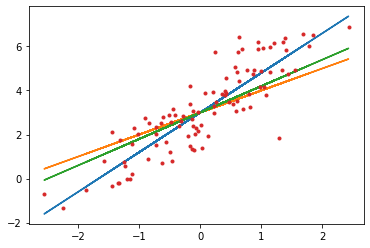

In [11]:
x = np.random.randn(100)#生成100个样本点
w = 1.8
b = 3
y = w * x + b
#增加噪声，生成随机数
y_ = y + np.random.randn(100)
plt.plot(x, y)
y1 = 1.0 * x + b
plt.plot(x, y1)
y2 = 1.2 * x + b
plt.plot(x, y2)
plt.plot(x, y_, ".")
plt.show()

In [12]:
def step_gradient(b_cur, w_cur, points, lr):
    #梯度归零
    b_grad = 0
    w_grad = 0
    n = float(len(points))
    for i in range(int(n)):
        x = points[i, 0]
        y = points[i, 1]
        b_grad += 2 * (w_cur * x + b_cur - y)
        w_grad += 2 * (w_cur * x + b_cur - y) * x
    b_grad = b_grad / n
    w_grad = w_grad / n
    new_b = b_cur - lr * b_grad
    new_w = w_cur - lr * w_grad
    return new_b, new_w
    


In [13]:
def update_progress(iteration, total):
    progress = iteration / total #迭代完成程度
    bar_length = 30
    finish_length = int(bar_length * progress) #表示已完成部分的长度
    bar = '=' * finish_length + '-' * (bar_length - finish_length)
    sys.stdout.write(f'\rProgress: [{bar}] {int(progress * 100)}%')
    sys.stdout.flush()

In [14]:
def runner(points, start_b, start_w, lr, epoch):
    b = start_b
    w = start_w
    for i in range(epoch):
        b, w = step_gradient(b, w, np.array(points), lr)
        update_progress(i+1, epoch)
    sys.stdout.write('\n')
    return [b, w]

In [15]:
csv_file = open("data.csv","w",encoding = "utf-8")
for i in range(len(x)):
    csv_file.write(f"{x[i]},{y_[i]}\n")
csv_file.close()

Progress: [==============================] 100%
y = 1.75380488370377 * x + 3.044565493138328


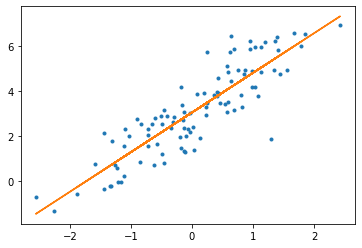

In [16]:
points = np.genfromtxt("data.csv", delimiter=",")
#超参设定
lr = 0.001
b_start = 0
w_start = 0
epoch = 10000
#训练过程
b, w = runner(points, b_start, w_start, lr, epoch)
print(f"y = {w} * x + {b}")
y_g = w * x + b
plt.figure(1)
plt.plot(x, y_, ".")
plt.plot(x, y_g)
plt.show()